本文来自 [贝叶斯棒球](http://yufree.github.io/blogcn/2016/06/12/bayes-baseball.html)。把其中R的代码翻译成Python。

## 什么是贝塔分布？

贝塔分布的本质是概率分布的分布。我们来看一个棒球击球率的估计问题，一共打了300个球，81个击中，219个击空。你可以计算出一个击中的概率：

$$\frac{\alpha}{\alpha + \beta} = \frac{81}{81+219} = 0.27
$$

这个概率应该来自于一个分布，而这个分布可能是参数为 $\alpha$ 与 $\beta$ 的贝塔分布。我们看下概率密度曲线：

In [11]:
import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt


%matplotlib inline

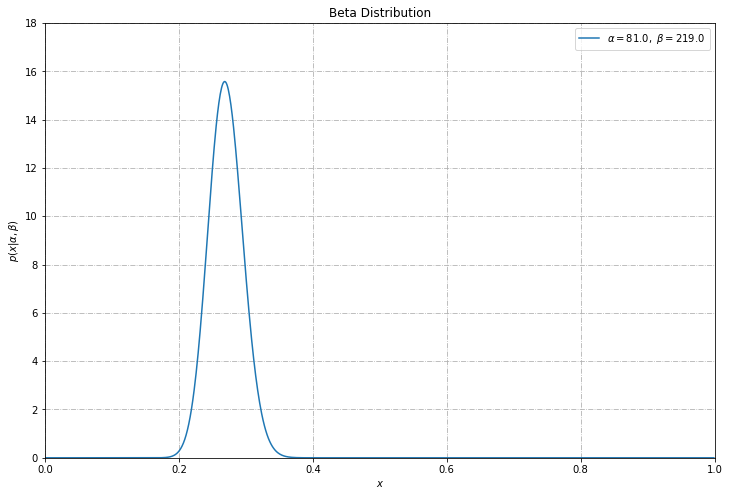

In [30]:

def show_beta(alpha_values, beta_values, max_y=18):
    color = ['b','r','g','y','m']
    x = np.linspace(0, 1, 1002)[1:-1]

    fig, ax = plt.subplots(figsize=(12,8))

    for a, b, c in zip(alpha_values, beta_values, colors):
        dist = beta(a, b)
        plt.plot(x, dist.pdf(x), c=c, label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

    plt.xlim(0, 1)
    plt.ylim(0, max_y)

    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\alpha,\beta)$')
    plt.title('Beta Distribution')

    plt.legend(loc=0)
    plt.grid(linestyle='-.')
    plt.show()
    
show_beta(alpha_values=[81], beta_values=[219])

## 为什么击球的概率分布符合贝塔分布？

设想球员A打了一个球打中了，那么在没有先验知识的情况下我会认为他击中概率为1；这个球员又打中了一个球，那么还是1；但第三个没打中，我们会认为他击中概率是0吗？一般而言，这类连续击球问题可以用二项分布来描述，例如10个球打中8个的概率，我们假设这个击球概率为q，那么这个概率应该是个q的函数：

$$
f(q) \propto q^a(1-q)^b
$$

那么我们继续关注这个球员，如果接着打了一个中了，那么如何更新这个概率？根据贝叶斯公式，最后推导出的结果如下：

$$
Beta(\alpha+1,\beta+0)
$$

根据公式可以看出我们对这个击球率的估计会高一点，这是贝塔分布的神奇之处，形式非常简单，理解也很直观。虽然贝塔分布不是为贝叶斯分析而设计的，但其数学性质非常便于进行贝叶斯分析。

## 先验与后验

如果我们后续观察的击球少，那么不太容易影响到对概率的先验估计。下图中可以看到图形几乎重合。

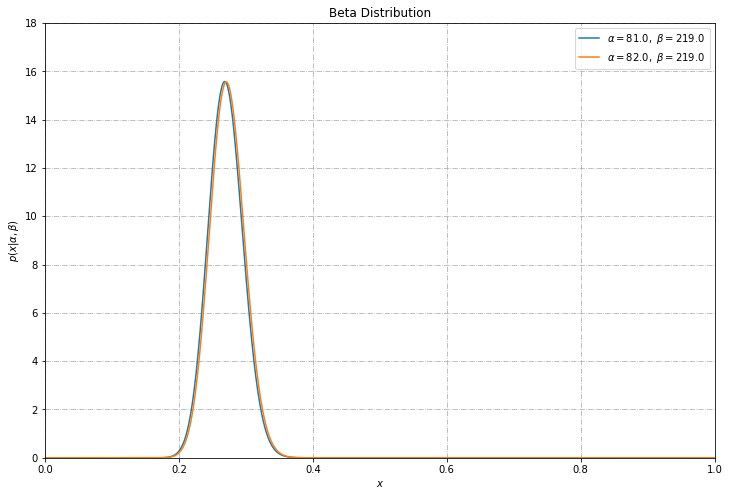

In [27]:
show_beta(alpha_values=[81, 81+1], beta_values=[219, 219])

如果后续观察了大量的击球都中了，那么概率会偏向后面数据所提供的击球率：

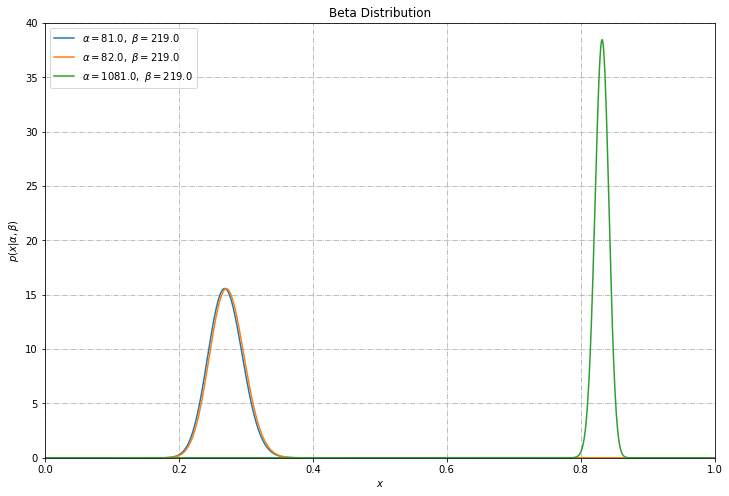

In [32]:
show_beta(alpha_values=[81, 81+1, 81+1000], beta_values=[219, 219, 219], max_y=40)